## Initialization

In [1]:
import sys
# sys.path.append('/Users/chandrasekharmukherjee/Home/Centrality framework/MCPC_Clustering/Codes')
sys.path.append('I:/내 드라이브/backup/document/USC/Research/MCPC/Code/Codes')

In [2]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm
# from Custom_Func import directed_modularity, modularity, _one_level


In [3]:
%load_ext autoreload
%autoreload 2
import importlib

import Real_Custom_v2 as Real_Custom
Real_Custom = importlib.reload(Real_Custom)

import FlowRank_General as FR
FR=importlib.reload(FR)

### Loading dataset

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from pynndescent import NNDescent
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
# from scanpy import read_h5ad
# import utils
import scipy
from scipy import sparse
import metric as met 
# import simulation as simm
import embedding as embed
import FlowRank as FR

from sklearn.metrics.cluster import normalized_mutual_info_score as NMI
from sklearn.metrics import v_measure_score as v_score
from sklearn.metrics import homogeneity_score as homogeneity
from sklearn.metrics import completeness_score as completeness


## Zhengmix dataset

### initialization

In [5]:
name='Zhengmix'
kchoice=20 #k neighbors in KNN
datapath = 'I:/내 드라이브/backup/document/USC/Research/MCPC/pca-benchmarks/pca-benchmarks/data/'

X = scipy.sparse.load_npz(datapath+name + '/data.npz')
label = np.load(datapath+name+'/labels.npy')
print(name,len(label))

#Log transform+PCA
X.data = np.log1p(X.data)
print("Log transform done")
pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

# #Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

#Make a NetworkX Directed Graph from the edgelist
G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

Zhengmix 3994
Log transform done
(3994, 50)
Accuracy of  20 -NN graph is 0.786
79880


In [6]:
from collections import defaultdict, deque

def get_labels(partition,n_s):
    final_partition_1 = deque(partition, maxlen=1).pop()
    #print(final_partition_1)


    label_1=np.zeros((n_s))
    c=0
    for sets in final_partition_1:
        for ell in sets:
            label_1[ell]=c
        
        c=c+1

    return label_1

### Result Metrics Table and Visualization

i:\내 드라이브\backup\document\USC\Research\MCPC\Code\Codes\FlowRank_General.py:187: RuntimeWarning: invalid value encountered in scalar divide
  


Max NMI and Purity for Rd+FR_Re+FL+Cust_2 :
 [0.809, 0.667] res: 0.5 
 [0.686, 0.82] res: 3.7
Max NMI and Purity for Rd+FR_avg+FL+Cust_2 :
 [0.806, 0.667] res: 1.7 
 [0.795, 0.677] res: 3.6
Max NMI and Purity for Rd+FR_Re+FL_ng+Cust_1 :
 [0.805, 0.667] res: 0.2 
 [0.724, 0.799] res: 3.0
Max NMI and Purity for Rd+FR_Re+FL_pr+Cust_2 :
 [0.805, 0.667] res: 0.4 
 [0.65, 0.802] res: 3.4
Max NMI and Purity for Rd+FR_Re+FL+Cust_1 :
 [0.804, 0.667] res: 0.4 
 [0.719, 0.818] res: 3.3
Max NMI and Purity for Ord+FR_avg+FL_ng+Louv :
 [0.802, 0.667] res: 0.175 
 [0.753, 0.802] res: 0.8
Max NMI and Purity for Ord+FR_Re+FL_ng+Louv :
 [0.802, 0.667] res: 0.175 
 [0.772, 0.817] res: 0.775
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust_2 :
 [0.799, 0.666] res: 0.6 
 [0.756, 0.817] res: 2.9
Max NMI and Purity for Ord+FR_Re+FL_ng+Cust_2 :
 [0.799, 0.666] res: 0.2 
 [0.712, 0.819] res: 2.9
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust_2 :
 [0.796, 0.667] res: 0.8 
 [0.737, 0.805] res: 2.0
Max NMI and Purity fo

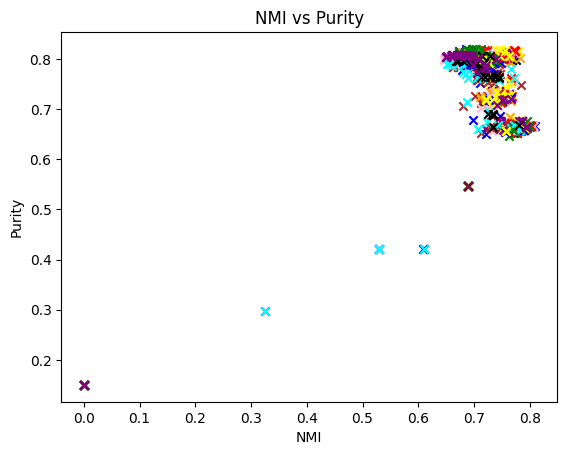

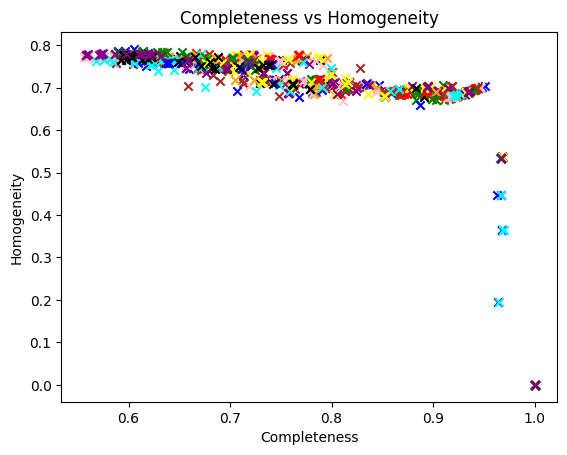

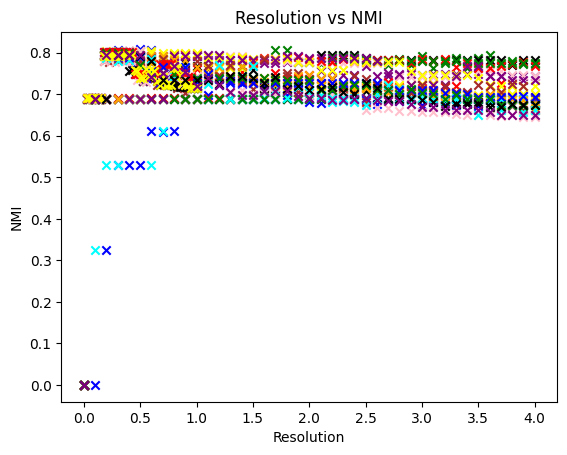

In [41]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = ['Louv','Cust_1','Cust_2']


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in range(3):
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                if Mod_type==0:
                    res_list = []
                    for i in range(41):
                        res_list.append(i/40)
                    #res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5]
                    #res_list=[0.24,0.26]
                elif Mod_type==1:
                   
                    res_list = []
                    for i in range(41):
                        res_list.append(i/10)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                else:
                    #res_list = 0~4 with 0.1 increment (declare using for loop)
                    res_list = []
                    for i in range(41):
                        res_list.append(i/10)
                    # res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Testing exponential scale and log scale modularity function

Max NMI and Purity for Ord+FR_avg+FL_pr+Cust4 :
 [0.8, 0.666] res: 0.15 
 [0.655, 0.817] res: 1.95
Max NMI and Purity for Ord+FR_Re+FL_pr+Cust4 :
 [0.8, 0.666] res: 0.1 
 [0.671, 0.821] res: 1.6
Max NMI and Purity for Rd+FR_Re+FL+Cust5 :
 [0.794, 0.665] res: 0.4 
 [0.747, 0.79] res: 1.45
Max NMI and Purity for Ord+FR_Re+FL+Cust5 :
 [0.794, 0.664] res: 0.7 
 [0.743, 0.795] res: 1.85
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust5 :
 [0.791, 0.658] res: 1.35 
 [0.791, 0.658] res: 1.35
Max NMI and Purity for Ord+FR_Re+FL_ng+Cust5 :
 [0.791, 0.658] res: 0.25 
 [0.74, 0.795] res: 0.95
Max NMI and Purity for Rd+FR_avg+FL_ng+Cust6 :
 [0.79, 0.661] res: 1.05 
 [0.771, 0.669] res: 1.5
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust5 :
 [0.79, 0.661] res: 0.95 
 [0.753, 0.679] res: 1.95
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust3 :
 [0.79, 0.658] res: 0.15 
 [0.681, 0.811] res: 1.2
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust6 :
 [0.79, 0.658] res: 0.5 
 [0.733, 0.732] res: 1.8
Max NMI and Purity fo

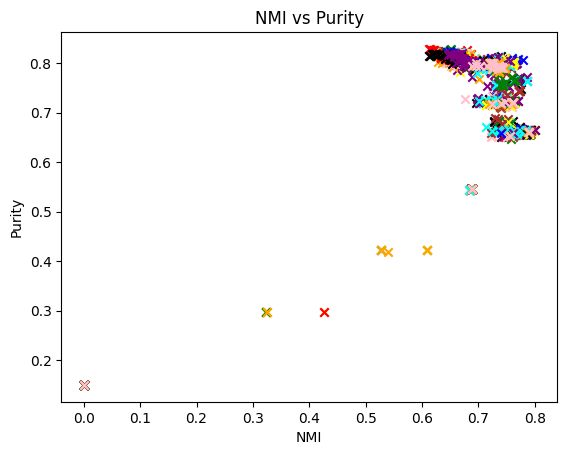

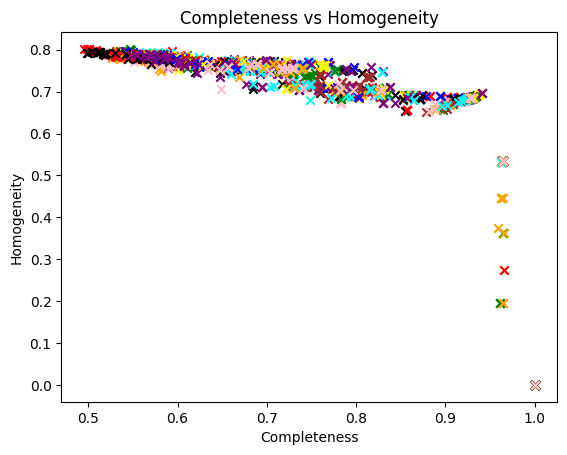

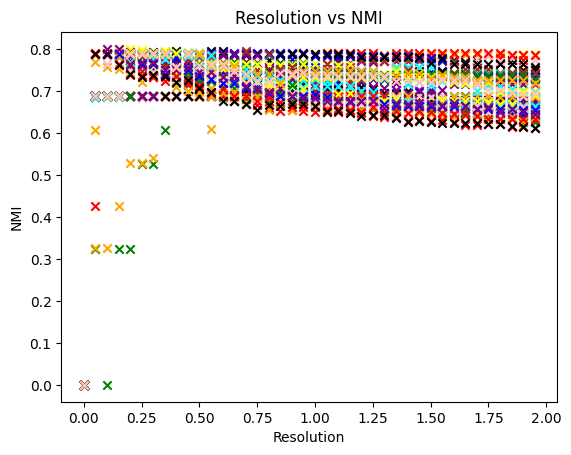

In [8]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = ['Cust3','Cust4','Cust5','Cust6']


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in range(4):
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                if Mod_type==0:
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5]
                    #res_list=[0.24,0.26]
                elif Mod_type==1:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                elif Mod_type==2:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                else:
                    #res_list = 0~4 with 0.1 increment (declare using for loop)
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    # res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type+3)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Testing Cust 7 + Cust 3&4 (Base 8)

Max NMI and Purity for Rd+FR_avg+FL_ng+Cust_4 :
 [0.798, 0.666] res: 0.1 
 [0.678, 0.82] res: 1.2
Max NMI and Purity for Rd+FR_Re+FL+Cust_7 :
 [0.796, 0.665] res: 0.35 
 [0.782, 0.81] res: 0.7
Max NMI and Purity for Rd+FR_Re+FL_ng+Cust_4 :
 [0.796, 0.666] res: 0.05 
 [0.65, 0.831] res: 1.3
Max NMI and Purity for Rd+FR_avg+FL+Cust_7 :
 [0.794, 0.665] res: 0.25 
 [0.726, 0.809] res: 1.25
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust_7 :
 [0.794, 0.665] res: 0.2 
 [0.702, 0.806] res: 1.2
Max NMI and Purity for Rd+FR_Re+FL_pr+Cust_7 :
 [0.794, 0.665] res: 0.2 
 [0.702, 0.806] res: 1.2
Max NMI and Purity for Rd+FR_Re+FL+Cust_4 :
 [0.792, 0.665] res: 0.05 
 [0.629, 0.83] res: 1.8
Max NMI and Purity for Rd+FR_Re+FL_pr+Cust_4 :
 [0.792, 0.663] res: 0.05 
 [0.586, 0.828] res: 1.9
Max NMI and Purity for Ord+FR_avg+FL_pr+Cust_4 :
 [0.791, 0.662] res: 0.1 
 [0.646, 0.823] res: 1.45
Max NMI and Purity for Ord+FR_Re+FL_pr+Cust_4 :
 [0.791, 0.662] res: 0.05 
 [0.599, 0.83] res: 1.75
Max NMI and Purity 

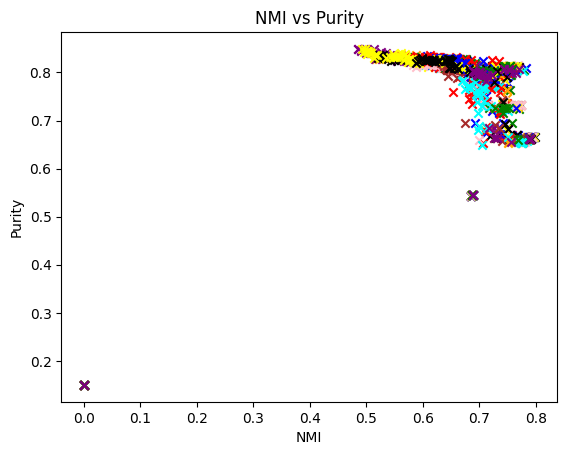

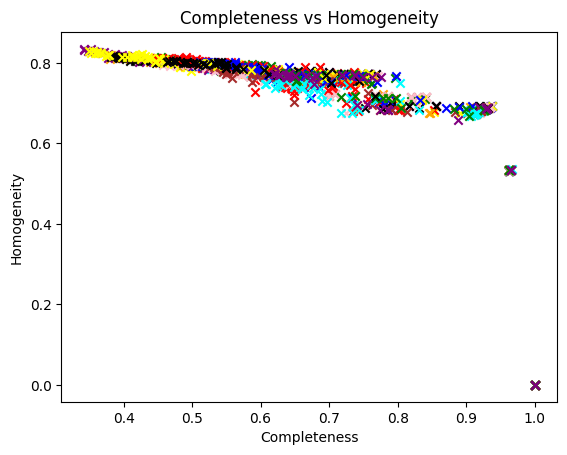

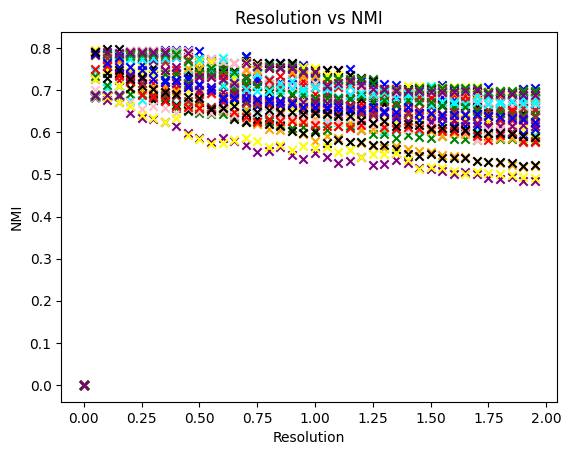

In [9]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = {3:'Cust_3', 4:'Cust_4', 7:'Cust_7'}


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in [3,4,7]:
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                if Mod_type==3:
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5]
                    #res_list=[0.24,0.26]
                elif Mod_type==4:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                elif Mod_type==7:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
               
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type, exp_base=8)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Testing First round Cust2 + Louvain after

Max NMI and Purity for Ord+FR_avg+FL_pr+Cust_7 :
 [0.808, 0.663] res: 1.6 
 [0.796, 0.663] res: 0.05
Max NMI and Purity for Ord+FR_Re+FL_pr+Cust_7 :
 [0.808, 0.663] res: 1.6 
 [0.796, 0.663] res: 0.05
Max NMI and Purity for Rd+FR_Re+FL+Cust_7 :
 [0.805, 0.667] res: 0.8 
 [0.805, 0.667] res: 0.8
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust_7 :
 [0.801, 0.663] res: 0.05 
 [0.801, 0.663] res: 0.05
Max NMI and Purity for Ord+FR_Re+FL_ng+Cust_7 :
 [0.801, 0.663] res: 0.05 
 [0.801, 0.663] res: 0.05
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust_7 :
 [0.794, 0.663] res: 1.2 
 [0.79, 0.663] res: 0.05
Max NMI and Purity for Rd+FR_Re+FL_pr+Cust_7 :
 [0.794, 0.663] res: 1.2 
 [0.79, 0.663] res: 0.05
Max NMI and Purity for Rd+FR_avg+FL+Cust_7 :
 [0.793, 0.662] res: 0.0 
 [0.793, 0.662] res: 0.0
Max NMI and Purity for Rd+FR_avg+FL_ng+Cust_7 :
 [0.793, 0.662] res: 0.0 
 [0.793, 0.662] res: 0.0
Max NMI and Purity for Rd+FR_Re+FL_ng+Cust_7 :
 [0.793, 0.662] res: 0.0 
 [0.793, 0.662] res: 0.0
Max NMI and

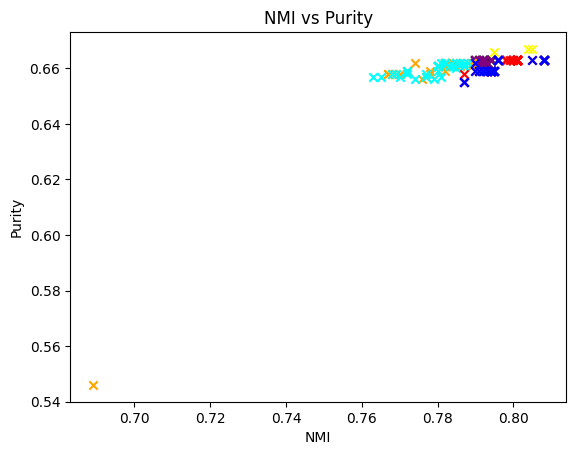

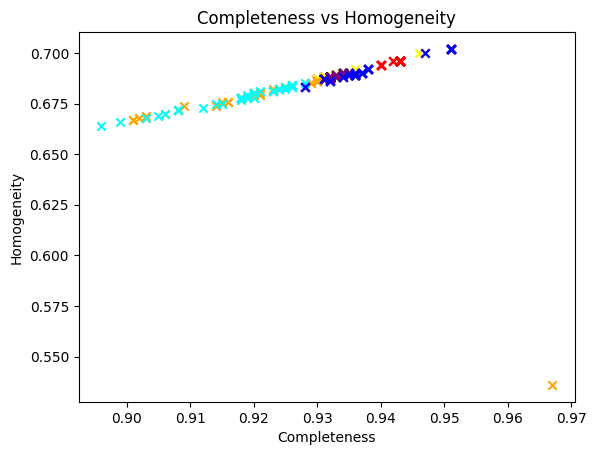

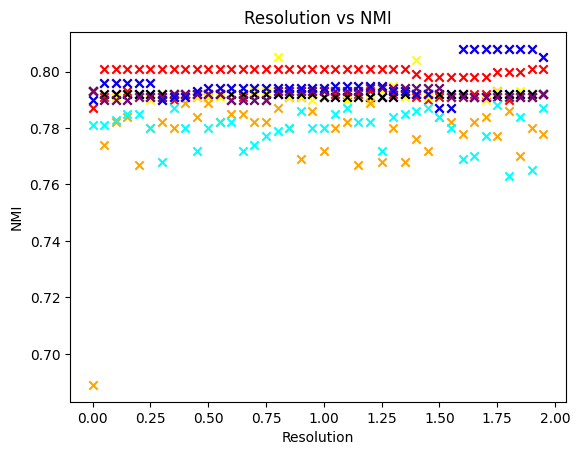

In [16]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = {3:'Cust_3', 4:'Cust_4', 7:'Cust_7'}


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in [7]:
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                res_list = []
                for i in range(40):
                    res_list.append(i/20)
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type, exp_base=8)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Testing cust 9

In [25]:
import analysis as an
import Real_Cust9 as RC9
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = {9:'Cust_9'}


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in [9]:
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                print(name)
                names.append(name)
                labels=[]

                res_list = []
                for i in range(10):
                    res_list.append(i/10)
                
                for res in res_list:
                    partition = RC9.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    print('NMI:',round(NMI(label,label_new),3),'res:',res)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                #print the nmi
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

Rd+FR_avg+FL+Cust_9
NMI: 0.0 res: 0.0


KeyboardInterrupt: 

## Fashion Mnist Dataset

### Initialization

In [8]:
import tensorflow as tf
import random
kchoice=20
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.fashion_mnist.load_data()

print(x_train.shape,y_train.shape)

X_F=x_train.reshape(x_train.shape[0], 784)
print(X_F.shape)
n=X_F.shape[0]
label_F=y_train

seq=[i for i in range(n)]
subset=random.sample(seq, n//5)

X=X_F[subset,:]
label=label_F[subset]

pca = TruncatedSVD(n_components=50)
PX = pca.fit_transform(X)
n=PX.shape[0]
walk_len_c1=int(np.log2(n))
print(PX.shape)


#Calculte inital KNN accuracy
met.KNN_graph_acc(PX,kchoice,0,label)

#Get the KNN edgelist
edge_list,vlist=embed.dir_KNN_graph(PX,kchoice,0)
print(len(edge_list))

G = nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

print(G.number_of_nodes())

(60000, 28, 28) (60000,)
(60000, 784)
(12000, 50)
Accuracy of  20 -NN graph is 0.758
240000
12000


### Louv, Cust1, Cust2

Max NMI and Purity for Ord+FR_Re+FL+Cust_2 :
 [0.689, 0.643] res: 0.3 
 [0.654, 0.664] res: 0.8
Max NMI and Purity for Ord+FR_avg+FL+Louv :
 [0.688, 0.643] res: 0.25 
 [0.651, 0.654] res: 0.5
Max NMI and Purity for Ord+FR_Re+FL+Louv :
 [0.687, 0.631] res: 0.25 
 [0.66, 0.644] res: 0.5
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust_1 :
 [0.685, 0.638] res: 1.0 
 [0.685, 0.638] res: 1.0
Max NMI and Purity for Rd+FR_avg+FL+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Rd+FR_avg+FL_ng+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Rd+FR_avg+FL_pr+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Rd+FR_Re+FL+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Rd+FR_Re+FL_ng+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Rd+FR_Re+FL_pr+Louv :
 [0.684, 0.643] res: 0.25 
 [0.684, 0.643] res: 0.25
Max NMI and Purity for Ord+FR_

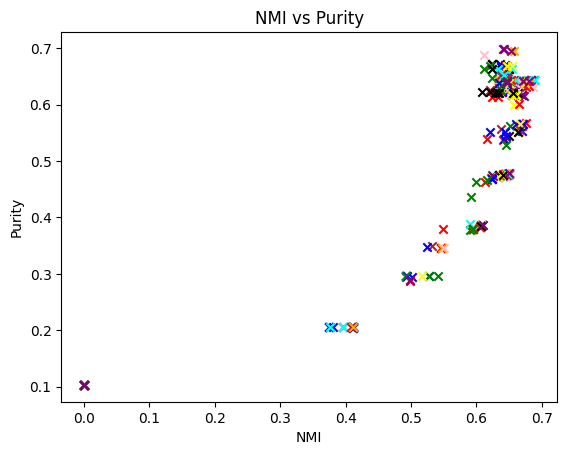

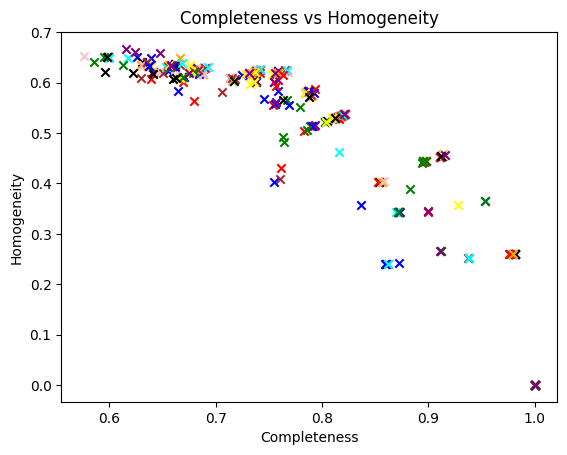

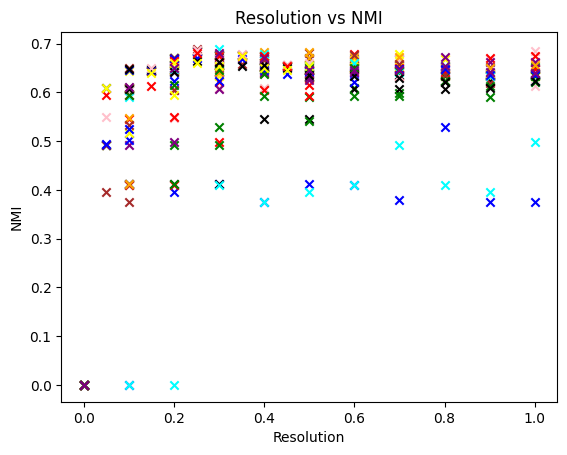

In [43]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = ['Louv','Cust_1','Cust_2']


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in range(3):
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                if Mod_type==0:
                    res_list = []
                    for i in range(11):
                        res_list.append(i/20)
                    #res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5]
                    #res_list=[0.24,0.26]
                elif Mod_type==1:
                   
                    res_list = []
                    for i in range(11):
                        res_list.append(i/10)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                else:
                    #res_list = 0~4 with 0.1 increment (declare using for loop)
                    res_list = []
                    for i in range(11):
                        res_list.append(i/10)
                    # res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Log scale and Exp Scale & FR first round + louvain after

Max NMI and Purity for Rd+FR_avg+FL_ng+Cust6 :
 [0.7, 0.643] res: 0.55 
 [0.632, 0.694] res: 1.85
Max NMI and Purity for Rd+FR_avg+FL_pr+Cust7 :
 [0.7, 0.641] res: 1.0 
 [0.697, 0.641] res: 0.05
Max NMI and Purity for Rd+FR_Re+FL_pr+Cust7 :
 [0.7, 0.641] res: 1.0 
 [0.697, 0.641] res: 0.05
Max NMI and Purity for Rd+FR_Re+FL+Cust4 :
 [0.697, 0.642] res: 0.15 
 [0.609, 0.737] res: 0.95
Max NMI and Purity for Rd+FR_avg+FL_ng+Cust7 :
 [0.695, 0.637] res: 1.5 
 [0.695, 0.637] res: 1.5
Max NMI and Purity for Rd+FR_Re+FL_ng+Cust7 :
 [0.695, 0.637] res: 1.5 
 [0.695, 0.637] res: 1.5
Max NMI and Purity for Rd+FR_Re+FL+Cust7 :
 [0.694, 0.645] res: 0.6 
 [0.694, 0.645] res: 0.6
Max NMI and Purity for Rd+FR_avg+FL+Cust4 :
 [0.692, 0.645] res: 0.2 
 [0.606, 0.734] res: 1.4
Max NMI and Purity for Rd+FR_avg+FL+Cust7 :
 [0.692, 0.646] res: 1.25 
 [0.692, 0.646] res: 1.25
Max NMI and Purity for Ord+FR_avg+FL+Cust3 :
 [0.691, 0.641] res: 0.2 
 [0.589, 0.733] res: 1.7
Max NMI and Purity for Ord+FR_avg+FL

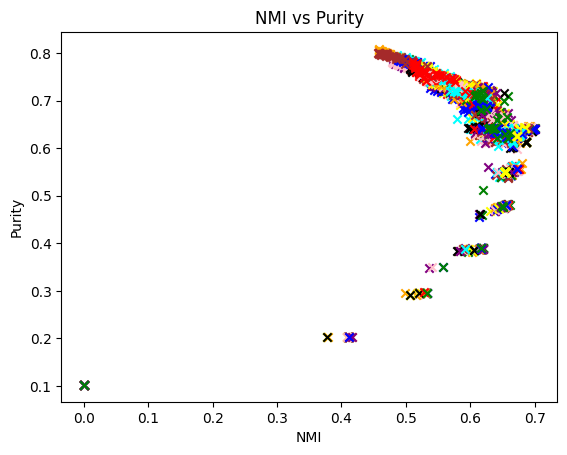

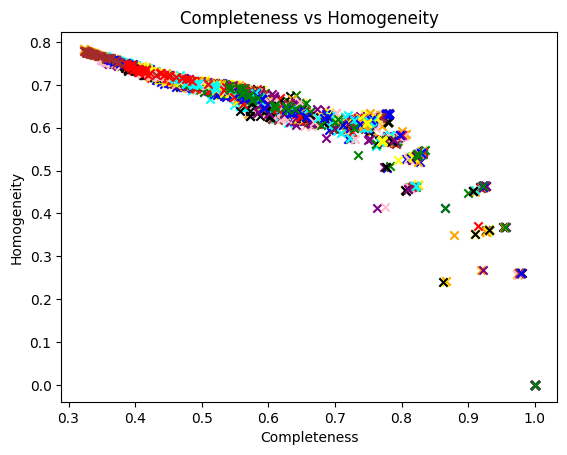

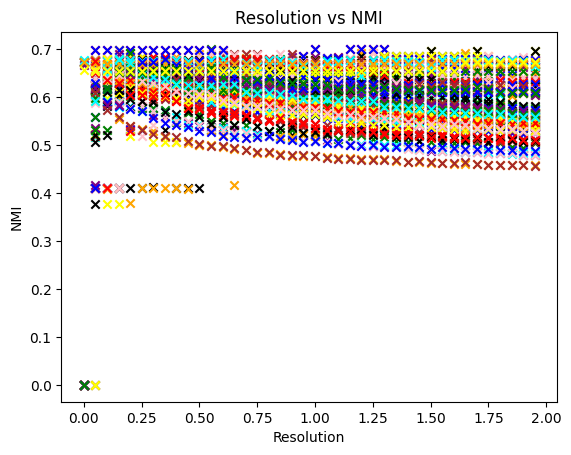

In [20]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = {3:'Cust3', 4:'Cust4', 5:'Cust5', 6:'Cust6', 32:'Cust3_2', 42:'Cust4_2', 7:'Cust7'} #3_2, 4_2 = exp base 8


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in [3,32,4,42,5,6,7]:
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]

                if Mod_type==0:
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list=[0.1,0.18,0.2,0.22,0.24,0.26,0.28,0.3,0.4,0.5,0.7,0.85,1,1.3,1.5]
                    #res_list=[0.24,0.26]
                elif Mod_type==1:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                elif Mod_type==2:
                   
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    #res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                else:
                    #res_list = 0~4 with 0.1 increment (declare using for loop)
                    res_list = []
                    for i in range(40):
                        res_list.append(i/20)
                    # res_list = [1.5,1.7,1.9,2,2.2,2.5,2.7,2.9,3,3.1,3.2,3.3,3.4,3.5,4]
                    #res_list=[3.3,3.5]
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### Cust 8 test (Cust6 & Louvain After)

FR_order: 0 FR_Rec: 0 FR_type: 0 Mod_type: 8
FR_order: 0 FR_Rec: 0 FR_type: 1 Mod_type: 8
FR_order: 0 FR_Rec: 0 FR_type: 2 Mod_type: 8
FR_order: 0 FR_Rec: 1 FR_type: 0 Mod_type: 8
FR_order: 0 FR_Rec: 1 FR_type: 1 Mod_type: 8
FR_order: 0 FR_Rec: 1 FR_type: 2 Mod_type: 8
FR_order: 1 FR_Rec: 0 FR_type: 0 Mod_type: 8
FR_order: 1 FR_Rec: 0 FR_type: 1 Mod_type: 8
FR_order: 1 FR_Rec: 0 FR_type: 2 Mod_type: 8
FR_order: 1 FR_Rec: 1 FR_type: 0 Mod_type: 8
FR_order: 1 FR_Rec: 1 FR_type: 1 Mod_type: 8
FR_order: 1 FR_Rec: 1 FR_type: 2 Mod_type: 8
Max NMI and Purity for Rd+FR_avg+FL+Cust8 :
 [0.687, 0.639] res: 0.3 
 [0.687, 0.639] res: 0.3
Max NMI and Purity for Rd+FR_avg+FL_ng+Cust8 :
 [0.674, 0.637] res: 0.3 
 [0.674, 0.637] res: 0.3
Max NMI and Purity for Rd+FR_Re+FL_ng+Cust8 :
 [0.674, 0.637] res: 0.3 
 [0.674, 0.637] res: 0.3
Max NMI and Purity for Ord+FR_avg+FL_ng+Cust8 :
 [0.672, 0.63] res: 0.55 
 [0.672, 0.63] res: 0.55
Max NMI and Purity for Ord+FR_Re+FL_ng+Cust8 :
 [0.672, 0.63] res: 0.55

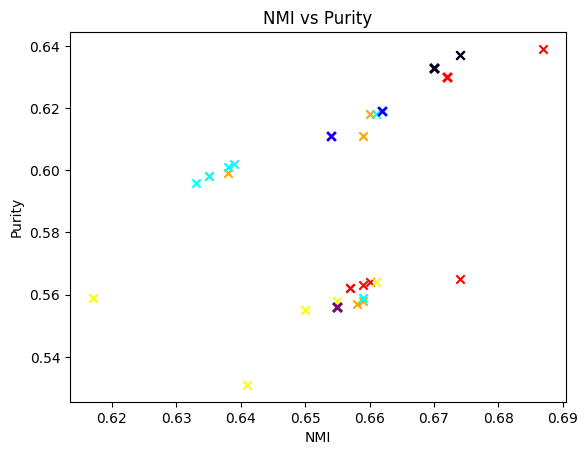

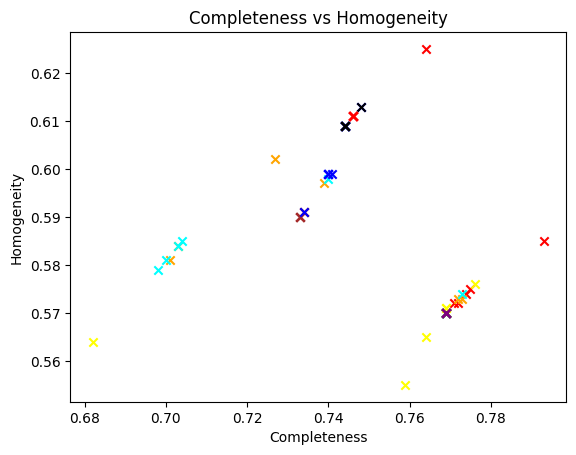

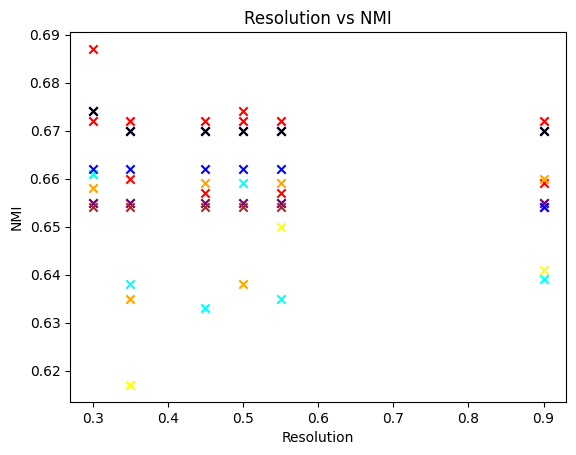

In [12]:
import analysis as an
import Real_Custom_General as RC

n=len(G.nodes())
res_=[] #0.26, 0.24 is best for Louvain, 3.3, 2.0
labels=[]
total_labels=[]
names = []

FR_ord = ['Rd', 'Ord']
FR_Recalc = ['FR_avg', 'FR_Re']
FR_tp = ['FL','FL_ng','FL_pr']
Mod_tp = {8:'Cust8'} #3_2, 4_2 = exp base 8


for FR_order in [0,1]:
    for FR_Rec in [0,1]:
        for FR_type in range(3):
            for Mod_type in [8]:
                name = str(FR_ord[FR_order] + '+' + FR_Recalc[FR_Rec] + '+' + FR_tp[FR_type] + '+' + Mod_tp[Mod_type])
                names.append(name)
                labels=[]
                print('FR_order:', FR_order, 'FR_Rec:', FR_Rec, 'FR_type:', FR_type, 'Mod_type:', Mod_type)
                    #res_list = 0~4 with 0.1 increment (declare using for loop)
                res_list = [0.55,0.5,0.9,0.3,0.35,0.45]
                
                
                for res in res_list:
                    partition = RC.louvain_partitions(G, seed=0,resolution=res,FR_order=FR_order, FR_Recalc=FR_Rec, FR_type=FR_type, Mod_type=Mod_type)
                    label_new=get_labels(partition,n)
                    labels.append(label_new)
                    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
                total_labels.append(labels)
                res_.append(res_list)
                
an.metrics_summary_general(total_labels,label,res_,names)
                
#an.metrics_summary(total_labels,label,res_,names)

### FR trend test

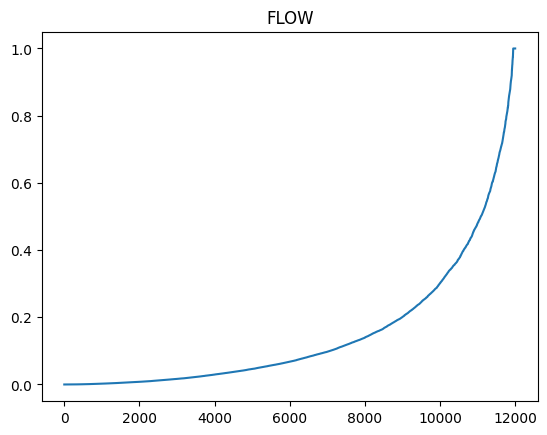

C:\Users\MSI\AppData\Local\Temp\ipykernel_15172\352171617.py:11: RuntimeWarning: divide by zero encountered in log
  plt.plot([-np.log(x[0]) for x in result])


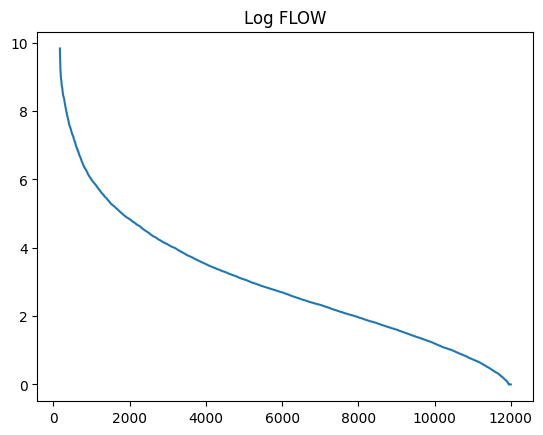

In [62]:
import FlowRank_General as FR
result = list(FR.FLOW(G.edges(),G.nodes(), 50))
#print(result)
#sort the result by first element
result.sort(key=lambda x: x[0])
#plot the result, first element as y, index as x
plt.plot([x[0] for x in result])
#name the plt as FLOW
plt.title('FLOW')
plt.show()
plt.plot([-np.log(x[0]) for x in result])
plt.title('Log FLOW')  
plt.show()

Text(0.5, 1.0, 'FLOW_ng')

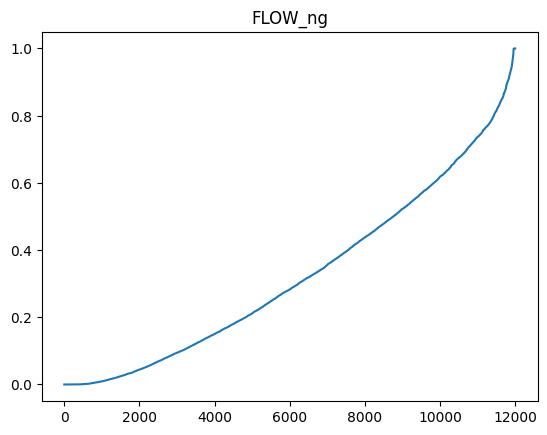

In [52]:
import FlowRank_General as FR
result = list(FR.FLOW_ng(G.edges(),G.nodes(), 50))
#print(result)
#sort the result by first element
result.sort(key=lambda x: x[0])
#plot the result, first element as y, index as x
plt.plot([x[0] for x in result])
#name the plt as FLOW
plt.title('FLOW_ng')

Text(0.5, 1.0, 'FLOW_ng_prop')

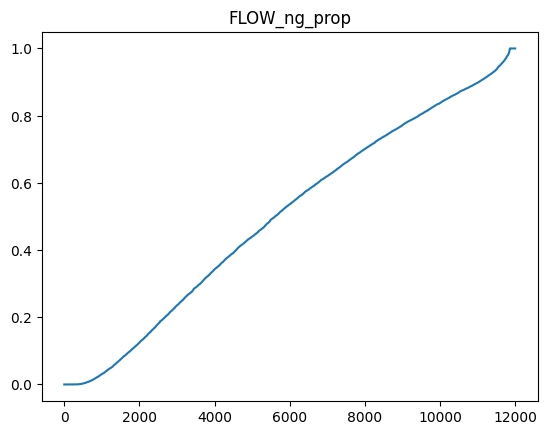

In [55]:
import FlowRank_General as FR
result = list(FR.FLOW_ng_prop(G.edges(),G.nodes(), 50))
#print(result)
#sort the result by first element
result.sort(key=lambda x: x[0])
#plot the result, first element as y, index as x
plt.plot([x[0] for x in result])
#name the plt as FLOW
plt.title('FLOW_ng_prop')

## Artificial Graph with Strong MCPC characteristics

In [7]:
def graph_simulation_uniform(sizes,prob_mat):

    kchoice=20

    size1=[0]
    t=0
    n_c=len(sizes)
    n=sum(sizes)
    print(n)

    for i in range(n_c):
        t=t+sizes[i]
        size1.append(t)

    label=[]
    n=sum(sizes)

    
    edge_list=[]
    vlist=[i for i in range(n)]


    for ell in range(len(sizes)):
        for i in range(sizes[ell]):
            label.append(ell)

for i in range(n_s):
    for j in range(n_s):

        if((i<=n_s//2 and j <=n_s//2) or (i>n_s//2 and j>n_s//2)):
            if(val[i][j]>0.3 and ((j<=n_s) or (j>=75))): #j = core
                G.add_edge(i,j,weight=1)
            elif(val[i][j]>0.9):
                G.add_edge(i,j,weight=1)
        else:
            if(val[i][j]>0.99):
                G.add_edge(i,j,weight=1)






    return edge_list,vlist,label,label 



#0,3 and 3,0 are replaced

#0,3 (0.2-beta)/8
#3,0 (0.2+beta)/8

def get_many_graphs(beta,sizes):

    prob_mat=np.array(
    [
    [0.8+beta,7*(0.2-beta)/16,7*(0.2-beta)/16,(0.2-beta)/8],
    [0.4+beta,3*(0.6-beta)/8,3*(0.6-beta)/8,(0.6-beta)/4],
    [(0.6+beta)/4,3*(0.6+beta)/8,3*(0.6+beta)/8,0.4-beta],
    [(0.2+beta)/8,7*(0.2+beta)/16,7*(0.2+beta)/16,0.8-beta]
    ]
    )
    
    print(prob_mat.shape)

    print(prob_mat)

    edge_list,vlist,label1,sub_label=graph_simulation_uniform(sizes,prob_mat)

    return edge_list,vlist,label1,sub_label

In [12]:
sizes=[250,250,250,250]
edge_list,vlist,label,sub_label=get_many_graphs(0,sizes)

G=nx.DiGraph()
for (u,v) in edge_list:
    G.add_edge(u,v,weight=1)

(4, 4)
[[0.80 0.09 0.09 0.03]
 [0.40 0.22 0.22 0.15]
 [0.15 0.22 0.22 0.40]
 [0.03 0.09 0.09 0.80]]
1000


         NMI  Purity  V-score  Homogeneity  Completeness
0.10    0.00    0.25     0.00         0.00          1.00
0.30    0.00    0.25     0.00         0.00          1.00
0.50    0.47    0.50     0.47         0.34          0.75
0.70    0.44    0.50     0.44         0.33          0.67
0.85    0.54    0.63     0.54         0.48          0.62
0.95    0.61    0.68     0.61         0.55          0.70
1.00    0.64    0.70     0.64         0.58          0.73
1.05    0.58    0.72     0.58         0.61          0.55
1.10    0.60    0.74     0.60         0.64          0.57
1.30    0.56    0.76     0.56         0.71          0.46
1.50    0.54    0.77     0.54         0.71          0.44
3.00    0.22    0.65     0.22         0.45          0.14
5.00    0.21    0.65     0.21         0.48          0.13
7.00    0.23    0.70     0.23         0.56          0.15
10.00   0.24    0.71     0.24         0.61          0.15
0.10    0.00    0.25     0.00         0.00          1.00
0.30    0.00    0.25     0.00  

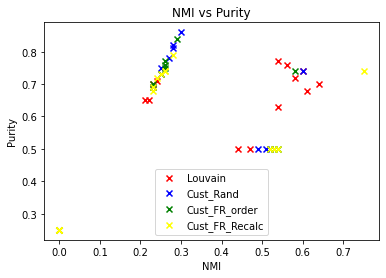

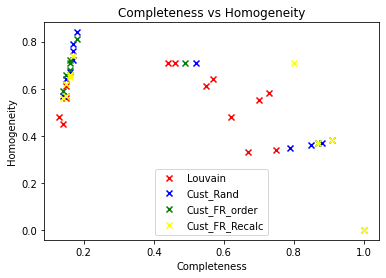

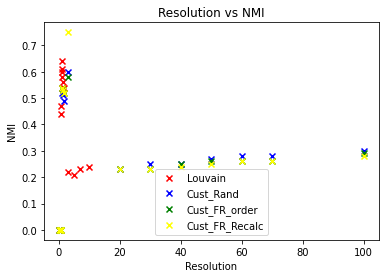

In [13]:
import analysis as an
n=len(G.nodes())
res_=[]
res_list=[0.1,0.3,0.5,0.7,0.85,0.95,1,1.05,1.1,1.3,1.5,3,5,7,10]
#res_list=[0.8,1]
labels=[]
total_labels=[]
names = ['Louvain','Cust_Rand','Cust_FR_order','Cust_FR_Recalc']

for res in res_list:
    partition = nx_comm.louvain.louvain_partitions(G, seed=0,resolution=res)
    label_new=get_labels(partition,n)
    labels.append(label_new)
    #print(res,round(NMI(label,label_new),2),round(met.purity_score(label,label_new),2))
total_labels.append(labels)
res_.append(res_list)
#print("\n\n")

labels=[]
#res_list=[0.8,0.85,0.9,0.95,1,1.05,1.1,1.2,1.3,1.5,3,5,7,10]
res_list=[0.1,0.3,0.5,0.7,1.1,1.3,1.5,3,20,30,40,50,60,70,100]
#res_list = [1,10]
for res in res_list:
    partition1=Real_Custom.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
    #print(res,round(NMI(label,label_new1),2),round(met.purity_score(label,label_new1),2))
total_labels.append(labels)   
res_.append(res_list)

import Real_Custom_v3 as RC3
labels=[]
for res in res_list:
    partition1=RC3.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

import Real_Custom_v4 as RC4
labels=[]
for res in res_list:
    partition1=RC4.louvain_partitions(G, seed=0,resolution=res)
    label_new1=get_labels(partition1,n)
    labels.append(label_new1)
total_labels.append(labels) 
res_.append(res_list)

an.metrics_summary(total_labels,label,res_,names)